In [171]:
import pandas as pd
from pandapower.timeseries.run_time_series import run_timeseries
import matplotlib
matplotlib.rcParams['timezone'] = 'Europe/Berlin'

import data_process_base
import importlib
importlib.reload(data_process_base)

try:
    import seaborn
    colors = seaborn.color_palette()
except:
    colors = ["b", "g", "r", "c", "y"]

In [172]:
# create random time series from import data
da = data_process_base.DataAction()
nc = data_process_base.net_calc()

da.folder_path = r"G:\\My Drive\\docs\\Education\\University\\ALUF\\SSE\\6 sem\\Bachelor Thesis\\data\\"
keep_cols = ['DE_KN_residential1_grid_import',
             'DE_KN_residential2_grid_import',
             'utc_timestamp']
da.imp_procc("house_data.csv", keep_cols)

Number of data frame segments =  90
dfList created successfully.


In [173]:
def end_results(sgen_val, iter):
    """Final boss"""
    
    # create df to store output
    col_names = ['line_1', 'line_2', 'line_3', 'line_4', 'line_5', 'line_6', 'line_7', 'line_8']
    end_vals = pd.DataFrame(columns=col_names)
    end_times = pd.DataFrame(dtype='str', columns=col_names)

    for i in range(0, iter):
        # iterative scramble
        night_merge = da.power_merge()

        # assign generator value at random times
        # night_mw = da.sgen_comm(ts=night_merge, wind_length=60, sgen_val=sgen_val, parties=4)
        night_mw = da.sgen_rand(ts=night_merge, sgen_val=sgen_val)

        nc.four_loads_branched_make(night_mw)
        nc.four_loads_branched_out("res_line", "loading_percent")
        nc.four_loads_branched_run()
        nc.four_loads_branched_read_loadpct()

        nc.end_vals_step(nc.ll, end_vals)
        nc.end_times_step(nc.ll, end_times)

    return end_vals, end_times


iter = 1
sgen_val = 0.01 # typical val: 0.010 MW = 10kW
end_vals, end_times = end_results(sgen_val, iter)

100%|██████████| 601/601 [00:01<00:00, 361.17it/s]


In [174]:
end_vals

,line_1,line_2,line_3,line_4,line_5,line_6,line_7,line_8
0,33.803049,22.734375,16.292632,8.516782,11.741119,8.496619,10.901931,8.517059


In [175]:
end_times

,line_1,line_2,line_3,line_4,line_5,line_6,line_7,line_8
0,19:52:00,19:52:00,20:46:00,21:34:00,21:19:00,02:51:00,20:46:00,21:34:00


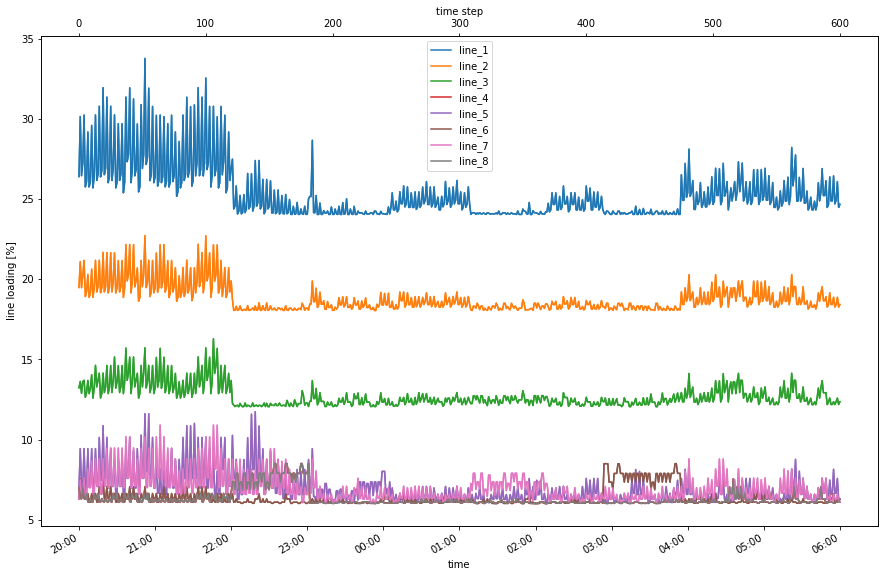

In [176]:
nc.four_loads_branched_plot_linepct()

100%|██████████| 2/2 [00:00<00:00, 46.43it/s]


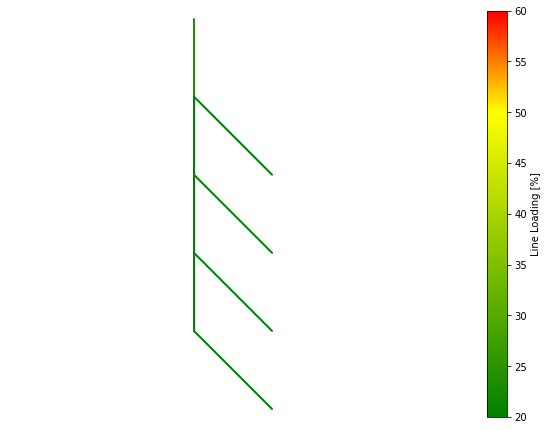

In [177]:
nc.load_graph(nc.net, time_step=170)